In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import copy

In [2]:
class AB_model(nn.Module):
    def __init__(self, dim):
        super(AB_model, self).__init__()
        self.A = nn.Parameter(torch.rand([dim, dim]))
        self.B = nn.Parameter(torch.rand([dim, dim]))
    
    def forward(self, x):
        return self.A @ self.B

In [3]:
def train(model: nn.Module, target, epochs=100, lr=0.001, w_dec=0.0, perturbs=0.0):
    losses = []
    optim = torch.optim.SGD(model.parameters(), lr=lr, weight_decay=w_dec)
    for epoch in range(epochs):
        optim.zero_grad()
        out = model(0)
        loss = F.mse_loss(out, target)
        loss.backward()
        optim.step()
        noise_A = torch.rand_like(target) * perturbs
        noise_B = torch.rand_like(target) * perturbs
        with torch.no_grad():
            model.A += noise_A
            model.B += noise_B
        if epoch % 10 == 0:
            print(f'epoch: {epoch}, loss: {loss}')
        losses.append(loss.item())
    return losses

In [4]:
dim = 256

model = AB_model(dim)
model_w_dec = copy.deepcopy(model)
model_noise = copy.deepcopy(model)
model_w_dec_noise = copy.deepcopy(model)
target = torch.randn([dim, dim]) * 2
epochs = 5000
lr = 0.02
losses = train(model, target, epochs, lr, w_dec=0.0)
losses_w_dec = train(model_w_dec, target, epochs, lr, w_dec=0.1)
losses_noise = train(model_noise, target, epochs, lr, perturbs=0.004)
losses_w_dec_noise = train(model_w_dec_noise, target, epochs, lr, w_dec=0.1, perturbs=0.004)

epoch: 0, loss: 4099.03369140625
epoch: 10, loss: 2834.257568359375
epoch: 20, loss: 2077.5009765625
epoch: 30, loss: 1588.6942138671875
epoch: 40, loss: 1254.620849609375
epoch: 50, loss: 1016.165771484375
epoch: 60, loss: 839.9925537109375
epoch: 70, loss: 706.1339721679688
epoch: 80, loss: 602.033935546875
epoch: 90, loss: 519.47412109375
epoch: 100, loss: 452.8910827636719
epoch: 110, loss: 398.4095458984375
epoch: 120, loss: 353.262451171875
epoch: 130, loss: 315.4312744140625
epoch: 140, loss: 283.4153137207031
epoch: 150, loss: 256.0801086425781
epoch: 160, loss: 232.5550537109375
epoch: 170, loss: 212.16311645507812
epoch: 180, loss: 194.37124633789062
epoch: 190, loss: 178.75523376464844
epoch: 200, loss: 164.97398376464844
epoch: 210, loss: 152.75076293945312
epoch: 220, loss: 141.8591766357422
epoch: 230, loss: 132.1124725341797
epoch: 240, loss: 123.3555908203125
epoch: 250, loss: 115.45883178710938
epoch: 260, loss: 108.31312561035156
epoch: 270, loss: 101.82609558105469
e

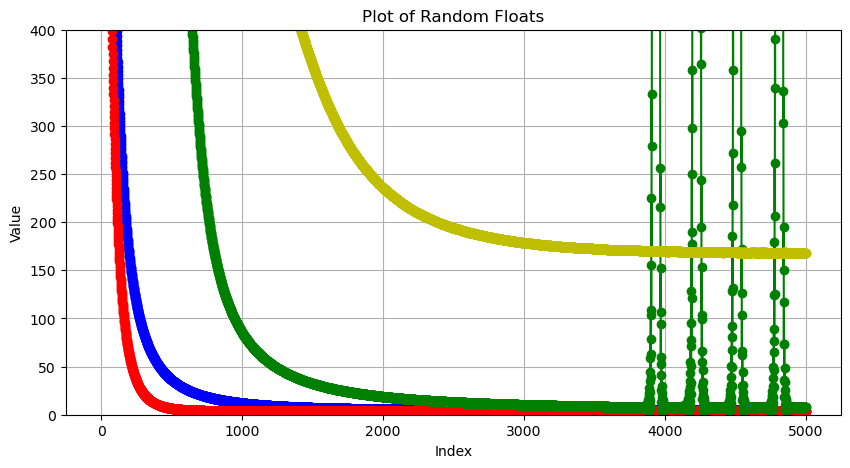

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(losses, marker='o', linestyle='-', color='b')
plt.plot(losses_w_dec, marker='o', linestyle='-', color='r')
plt.plot(losses_noise, marker='o', linestyle='-', color='g')
plt.plot(losses_w_dec_noise, marker='o', linestyle='-', color='y')
plt.title('Plot of Random Floats')
plt.xlabel('Index')
plt.ylabel('Value')
plt.ylim(0, 400)
plt.grid(True)
plt.show()

In [8]:
C = model(0)
print(torch.norm(C))
C_wdec = model_w_dec(0)
print(torch.norm(C_wdec))
C_noise = model_noise(0)
print(torch.norm(C_noise))
C_wdec_noise = model_w_dec_noise(0)
print(torch.norm(C_wdec_noise))


tensor(283.1631, grad_fn=<LinalgVectorNormBackward0>)
tensor(5.4874e-06, grad_fn=<LinalgVectorNormBackward0>)
tensor(565.2257, grad_fn=<LinalgVectorNormBackward0>)
tensor(3278.7249, grad_fn=<LinalgVectorNormBackward0>)
